In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
df = pd.read_csv("cubic_zirconia.csv")

In [120]:
df.shape

(26967, 11)

In [121]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [123]:
df = df.drop('Unnamed: 0', axis=1)

In [124]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [125]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [126]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


Text(0.5, 1.0, 'Proportion of Cuts')

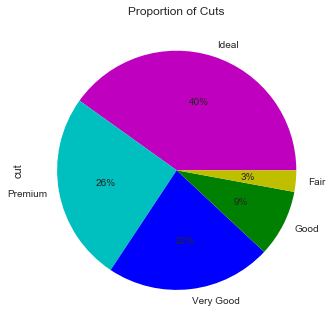

In [127]:
colors = ['m','c','b','g','y']
df.cut.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Cuts')

Text(0.5, 1.0, 'Proportion of Cuts')

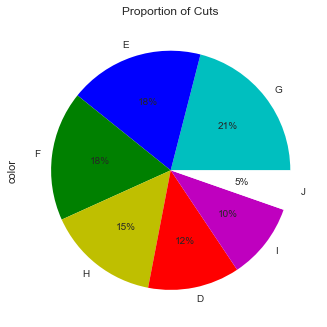

In [128]:
colors = ['c','b','g','y','r','m','w']
df.color.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Cuts')

Text(0.5, 1.0, 'Proportion of Cuts')

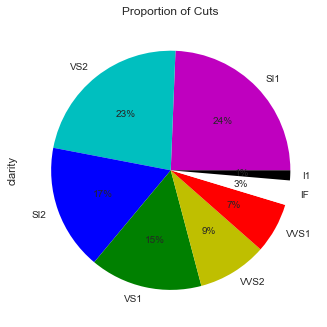

In [129]:
colors = ['m','c','b','g','y','r','w','k']
df.clarity.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Cuts')

In [130]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [131]:
#df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)
# Doing ordinal encoding for these categoric variables as these are ordinal quality attributes 

cut_dict = {'Fair': 0,
            'Good': 1,
            'Very Good': 2,
            'Premium': 3,
            'Ideal':4
           }
df.cut = df.cut.map(cut_dict)
df.cut.astype(str).astype(int)

color_dict = {'D': 6,'E': 5,'F': 4,'G': 3,'H': 2,'I': 1,'J': 0}
df.color = df.color.map(color_dict)
df.color.astype(str).astype(int)

clarity_dict = {'FL': 10,
               'IF': 9,
               'VVS1': 8,
               'VVS2': 7,
               'VS1': 6,
               'VS2': 5,
               'SI1': 4, 
               'SI2': 3, 
               'I1': 2, 
               'I2': 1, 
               'I3': 0}
df.clarity = df.clarity.map(clarity_dict)
df.clarity.astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null int64
color      26967 non-null int64
clarity    26967 non-null int64
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


In [132]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
cut,26967.0,2.909556,1.113229,0.0,2.00,3.00,4.00,4.00
color,26967.0,3.393889,1.705992,0.0,2.00,3.00,5.00,6.00
clarity,26967.0,5.053102,1.647042,2.0,4.00,5.00,6.00,9.00
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [133]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [134]:
df['depth'] = df['depth'].fillna(df['depth'].mean())          
df.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [135]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
cut,26967.0,2.909556,1.113229,0.0,2.00,3.00,4.00,4.00
color,26967.0,3.393889,1.705992,0.0,2.00,3.00,5.00,6.00
clarity,26967.0,5.053102,1.647042,2.0,4.00,5.00,6.00,9.00
depth,26967.0,61.745147,1.394481,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [137]:
print('Before: ',df.shape)
# Replace 0 in x,y & z to Nan and remove all missing values
df.x = df.x.replace(to_replace = 0 , value =np.nan)
df.y = df.x.replace(to_replace = 0 , value =np.nan)
df.z = df.x.replace(to_replace = 0 , value =np.nan)
df.dropna(inplace=True)
print('After: ',df.shape)

Before:  (26967, 10)
After:  (26964, 10)


In [138]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 47


In [139]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26964, 10)
After (26917, 10)


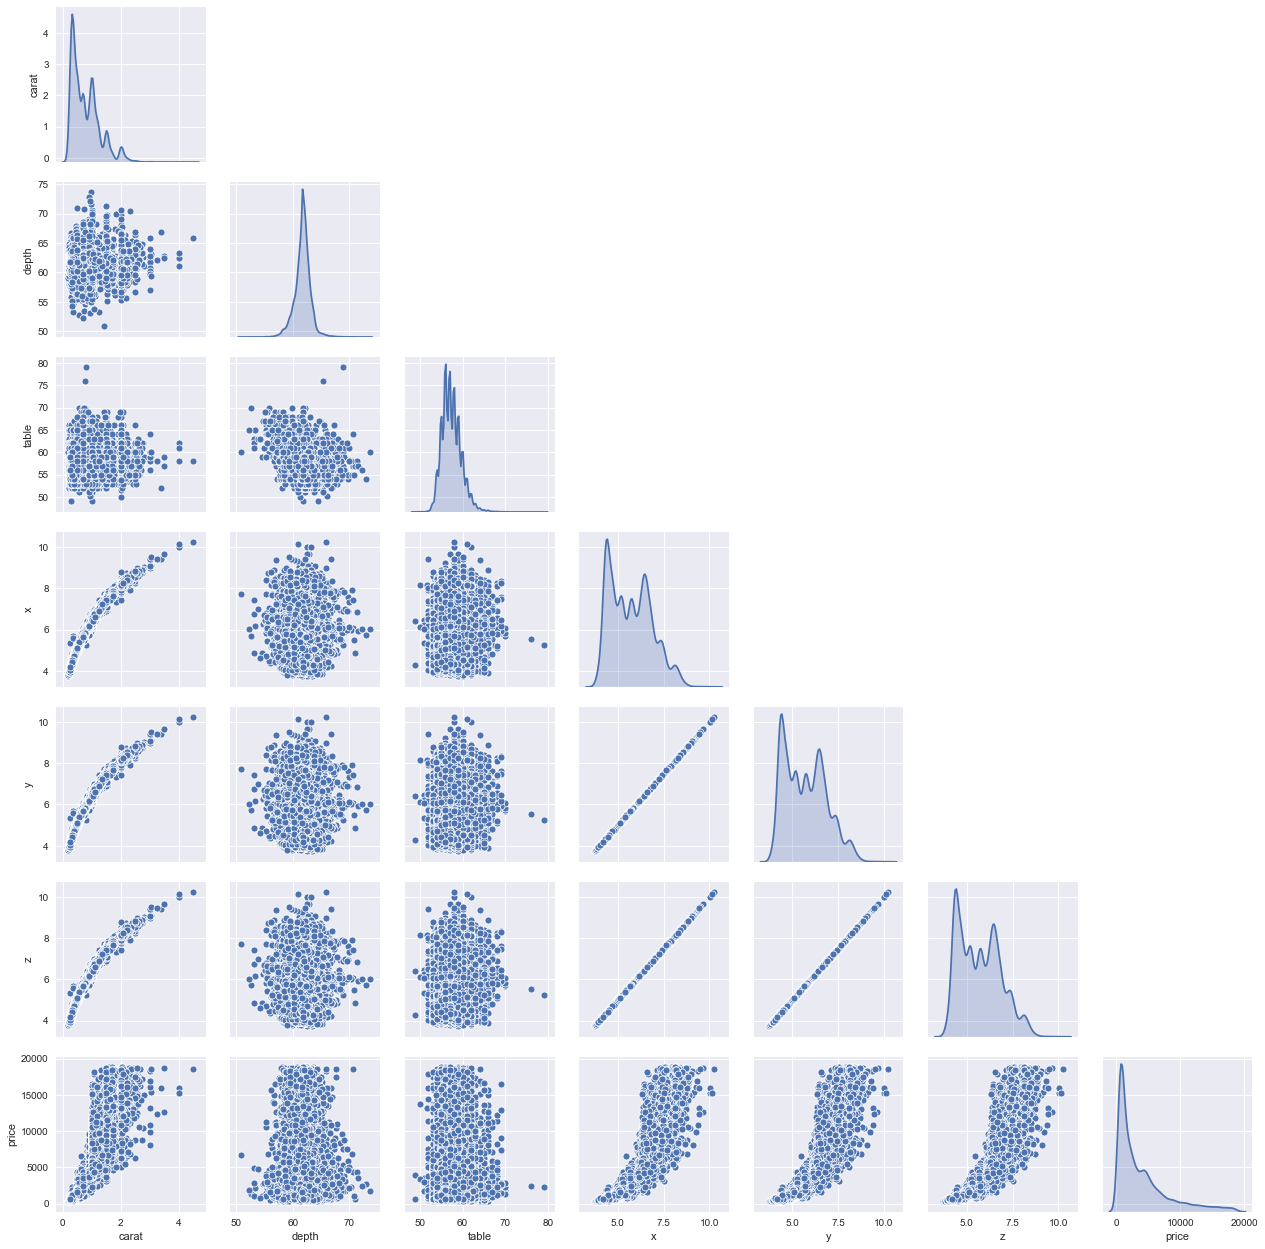

In [140]:
ax = sns.pairplot(df[['carat','depth','table','x','y','z','price']], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

(7.0, 0.0)

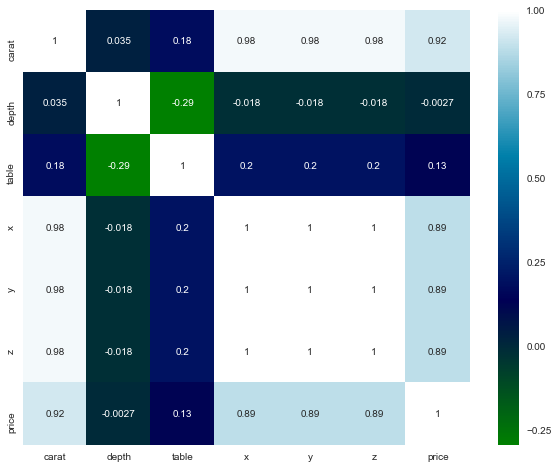

In [141]:
plt.subplots(figsize=(10,8))
ax = sns.heatmap(df[['carat','depth','table','x','y','z','price']].corr(), cmap='ocean', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

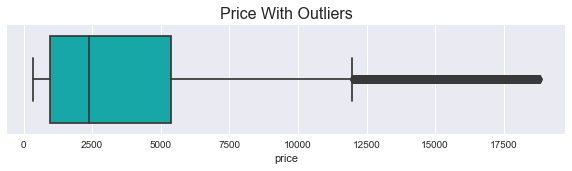

In [142]:
plt.figure(figsize=(10,2))
plt.title('Price With Outliers',fontsize=16)
sns.boxplot(df['price'] , orient = "h" , color = 'c')

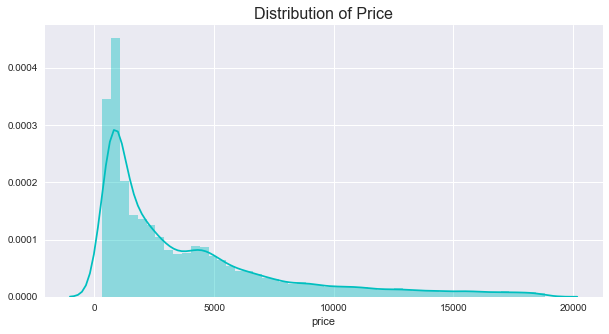

In [143]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Price',fontsize=16)
sns.distplot(df['price'], color = 'c' )

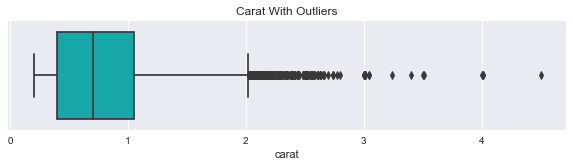

In [144]:
plt.figure(figsize=(10,2))
plt.title('Carat With Outliers',fontsize=12)
sns.boxplot(df['carat'] , orient = "h" , color = 'c')

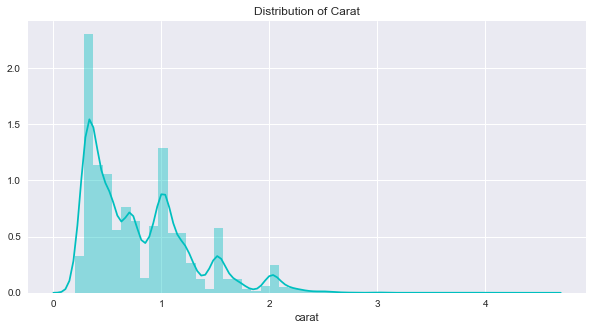

In [145]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Carat',fontsize=12)
sns.distplot(df['carat'], color = 'c' )

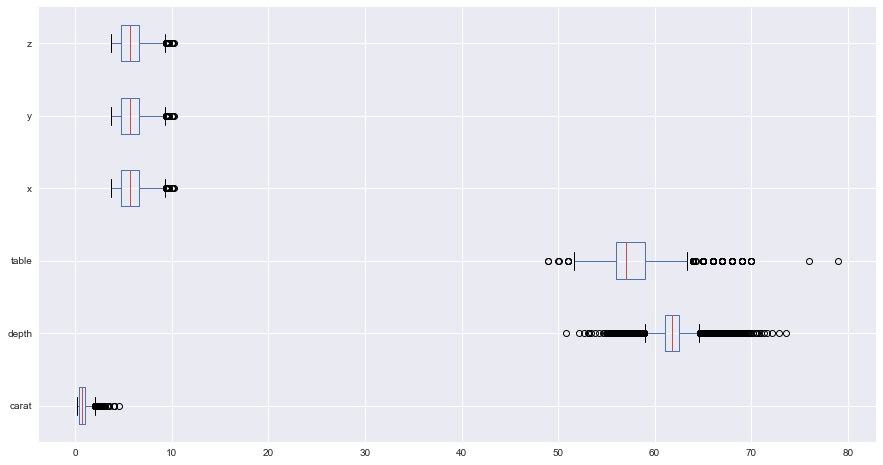

In [146]:
df[['carat','depth','table','x','y','z']].boxplot(figsize=(15,8), vert = 0)
#ns.boxplot(df[['carat','depth','table','x','y','z']] )

In [147]:
# To decide on removing outliers or not, checking the linear distribution of price against independent variables

Text(0.5, 1.0, 'Price Vs Carat')

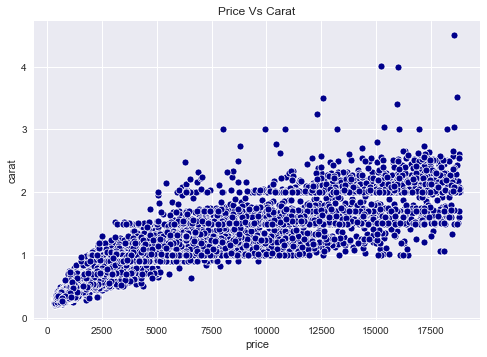

In [148]:
sns.scatterplot(df['price'], df['carat'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Carat')

Text(0.5, 1.0, 'Price Vs Depth')

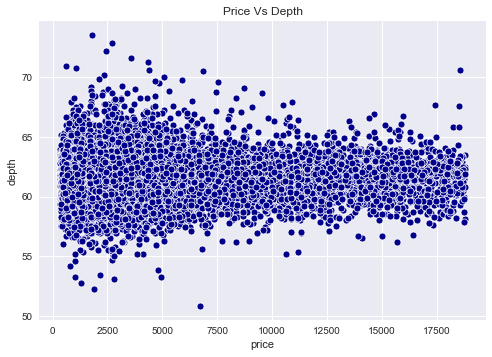

In [149]:
sns.scatterplot(df['price'], df['depth'], color = 'darkblue')
#sns.despine(left = False, bottom = False)
plt.title('Price Vs Depth')

Text(0.5, 1.0, 'Price Vs Table')

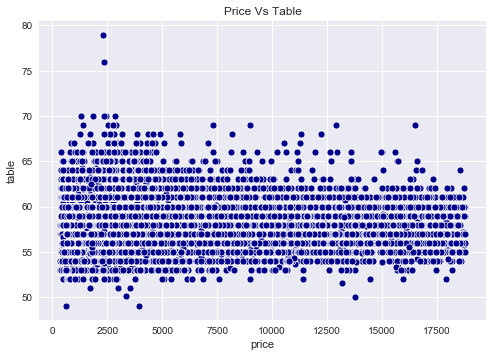

In [150]:
sns.scatterplot(df['price'], df['table'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Table')

Text(0.5, 1.0, 'Price Vs X')

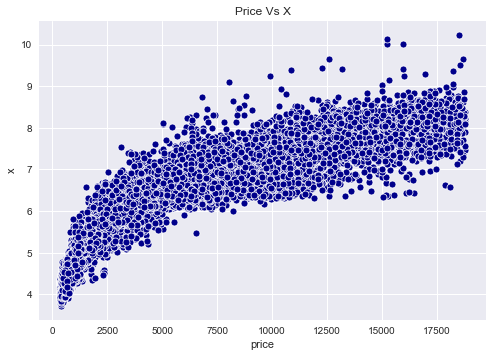

In [151]:
sns.scatterplot(df['price'], df['x'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs X')

In [152]:
# Removing outliers as outliers in price and carat can influence the linear equation towards the outliers

In [153]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [154]:
#cont=df[['carat','depth','table','x','y','z', 'price']].index
for column in df[['carat','depth','table','x','y','z', 'price']].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

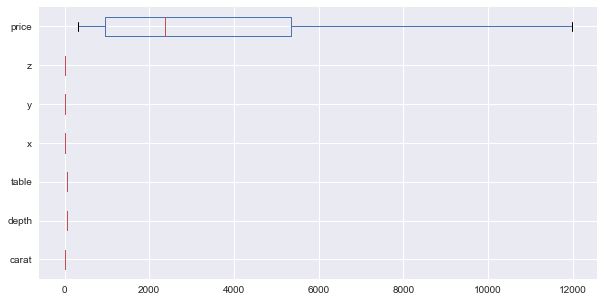

In [155]:
df[['carat','depth','table','x','y','z', 'price']].boxplot(figsize=(10,5), vert = 0)

Text(0.5, 1.0, 'Price Vs Carat')

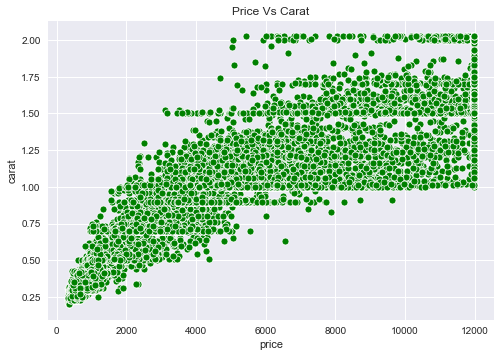

In [156]:
sns.scatterplot(df['price'], df['carat'], color = 'green')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Carat')

Text(0.5, 1.0, 'Price Vs X')

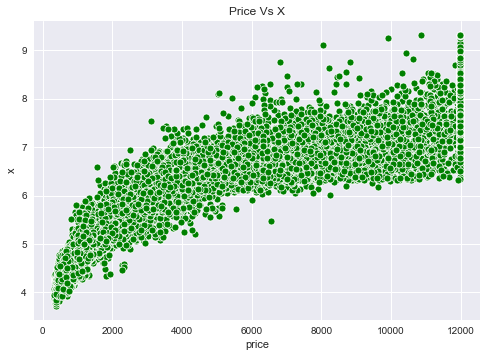

In [157]:
sns.scatterplot(df['price'], df['x'], color = 'green')
sns.despine(left = False, bottom = False)
plt.title('Price Vs X')

In [158]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=25)

In [160]:
X_train.shape

(18841, 9)

In [161]:
X_test.shape

(8076, 9)

In [162]:
y_train.shape

(18841, 1)

In [163]:
y_test.shape

(8076, 1)

In [164]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8892.062993696502
The coefficient for cut is 104.55511505651353
The coefficient for color is 267.7662819773506
The coefficient for clarity is 434.15906554192566
The coefficient for depth is -35.00943288069546
The coefficient for table is -11.740996670103042
The coefficient for x is -135.76097535248093
The coefficient for y is -135.76097535248087
The coefficient for z is -135.76097535248087


In [166]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1554.940560471784


In [167]:
rsquare = regression_model.score(X_test, y_test)
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9272335173251998


In [168]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,predicted_train))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 905.0572421449746


In [169]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,predicted_test))
print("The Root Mean Squared Error for test {}".format(RMSE_test))

The Root Mean Squared Error for test 931.9221883970916


# Linear Regression using statsmodels

In [170]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
17417,0.320,4,2,9,61.9,54.2,4.38,4.38,4.38,783.0
22393,0.340,3,3,5,61.2,59.0,4.43,4.43,4.43,596.0
20522,2.025,2,1,5,62.5,58.0,8.09,8.09,8.09,11977.5
13908,0.510,4,3,5,62.4,56.0,5.11,5.11,5.11,1438.0
4534,0.320,3,2,5,62.7,58.0,4.35,4.35,4.35,605.0


In [205]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [206]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1554.940560
carat        8892.062994
cut           104.555115
color         267.766282
clarity       434.159066
depth         -35.009433
table         -11.740997
x            -135.760975
y            -135.760975
z            -135.760975
dtype: float64

In [207]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.698e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:34:22   Log-Likelihood:            -1.5500e+05
No. Observations:               18841   AIC:                         3.100e+05
Df Residuals:                   18833   BIC:                         3.101e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1554.9406    584.803     -2.659      0.0

In [208]:
#The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0
#The P value of all the independent variables are less than alpha, means all the variables are statistically significant in deciding Price
#The model can explain 93.2%of the variance in price as both the R squared and adjusted R squared values are .932

In [209]:
#mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
MSE_train = np.mean((lm1.predict(X_train)- y_train['price'])**2)

In [210]:
RMSE_train = np.sqrt(MSE_train)
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 905.0572421449725


In [211]:
np.sqrt(lm1.mse_resid) #same as above but another way

905.2494496846291

In [212]:
# Prediction on Test data
y_pred = lm1.predict(X_test)

Text(0.5, 1.0, 'Test Label Vs Predicted Label')

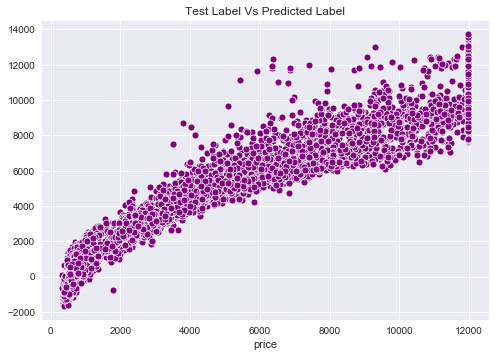

In [213]:
sns.scatterplot(y_test['price'], y_pred, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label')

In [214]:
#test for normality of residuals
import statsmodels.api as sm
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot(model.resid);
    plt.figure( figsize = (8,6));
    probplot.ppplot(line='45');
    plt.title(title);
    plt.show();

<Figure size 576x432 with 0 Axes>

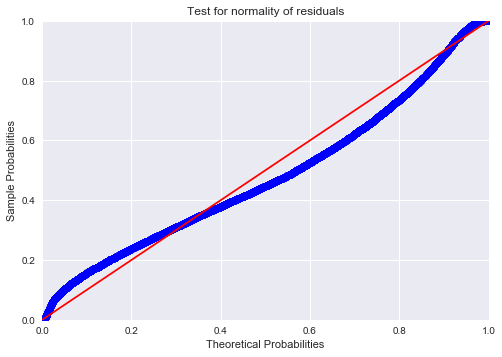

In [215]:
draw_pp_plot(lm1,"Test for normality of residuals")

In [216]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

In [217]:
def plot_resid_fitted(fitted, resid, title):
    sns.scatterplot(get_standardized_values( fitted ),
                    get_standardized_values( resid ),
                    color = 'darkblue')
    sns.despine(left = False, bottom = False) 
    plt.xlabel("Standardized predicted values")
    plt.ylabel("standardized residual values")
    plt.title(title)

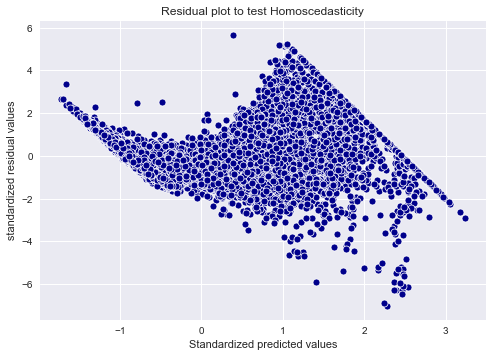

In [218]:
plot_resid_fitted(lm1.fittedvalues,
                  lm1.resid,
                  "Residual plot to test Homoscedasticity")

In [219]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1554.94) * Intercept + (8892.06) * carat + (104.56) * cut + (267.77) * color + (434.16) * clarity + (-35.01) * depth + (-11.74) * table + (-135.76) * x + (-135.76) * y + (-135.76) * z + 

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X_matrix,i) for i in range (X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column']= X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [221]:
vif_factors = get_vif_factors(X)
vif_factors

C:\Users\ratee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,column,VIF
0,carat,107.749383
1,cut,8.843211
2,color,5.535496
3,clarity,12.451131
4,depth,574.800463
5,table,577.205320
6,x,inf
7,y,inf
8,z,inf


In [223]:
vif_factors = get_vif_factors(X[['carat','cut','color','clarity','depth','table','x']])
vif_factors

C:\Users\ratee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,column,VIF
0,carat,107.749383
1,cut,8.843211
2,color,5.535496
3,clarity,12.451131
4,depth,574.800463
5,table,577.205320
6,x,738.541750


In [189]:
############# ITERATION 2 ##########

In [190]:
## trying to improve the model

In [191]:
y_train_sqrt = np.sqrt(y_train['price']) # transforming the response variable

In [193]:
data_train2 = pd.concat([X_train, y_train_sqrt], axis=1)
data_test2 = pd.concat([X_test,y_test],axis=1)
data_train2['volume']= data_train2['x']*data_train2['y']*data_train2['z']
data_test2['volume']= data_test2['x']*data_test2['y']*data_test2['z']
data_train2.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
17417,0.320,4,2,9,61.9,54.2,4.38,4.38,4.38,27.982137,84.027672
22393,0.340,3,3,5,61.2,59.0,4.43,4.43,4.43,24.413111,86.938307
20522,2.025,2,1,5,62.5,58.0,8.09,8.09,8.09,109.441765,529.475129
13908,0.510,4,3,5,62.4,56.0,5.11,5.11,5.11,37.920970,133.432831
4534,0.320,3,2,5,62.7,58.0,4.35,4.35,4.35,24.596748,82.312875
8764,0.750,4,3,7,61.3,55.0,5.85,5.85,5.85,59.371710,200.201625
23555,0.800,2,4,6,63.6,57.0,5.82,5.82,5.82,59.657355,197.137368
18605,2.020,4,1,3,61.7,57.0,8.05,8.05,8.05,109.441765,521.660125
2896,0.430,3,3,4,62.7,56.0,4.83,4.83,4.83,31.112698,112.678587
5993,1.070,4,3,3,62.4,57.0,6.56,6.56,6.56,66.475559,282.300416


In [302]:
vif_factors = get_vif_factors(data_train2[['carat','cut','color','clarity','x','volume']])
vif_factors

C:\Users\ratee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,column,VIF
0,carat,319.081330
1,cut,8.423378
2,color,5.517011
3,clarity,11.330653
4,x,72.369493
5,volume,285.472354


In [258]:
expr = 'price ~ carat + cut + color + clarity + volume + x'

In [259]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr, data = data_train2).fit()
lm2.params

Intercept   -89.080297
carat        49.669038
cut           0.737454
color         1.987285
clarity       3.257709
volume       -0.115795
x            18.077889
dtype: float64

In [260]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 8.234e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:42:18   Log-Likelihood:                -57661.
No. Observations:               18841   AIC:                         1.153e+05
Df Residuals:                   18834   BIC:                         1.154e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -89.0803      0.770   -115.694      0.0

<Figure size 576x432 with 0 Axes>

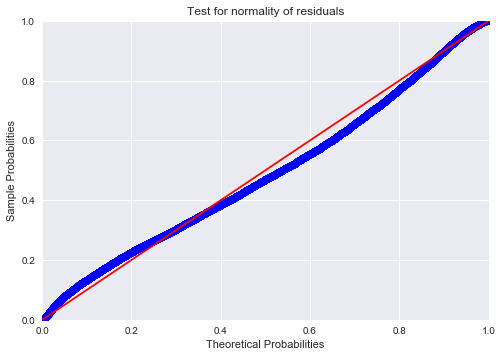

In [261]:
draw_pp_plot(lm2,"Test for normality of residuals")

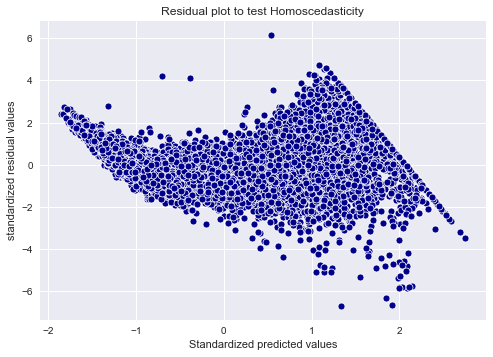

In [262]:
plot_resid_fitted(lm2.fittedvalues,
                  lm2.resid,
                  "Residual plot to test Homoscedasticity")

In [263]:
y_pred_train = lm2.predict(data_train2.drop('price',axis=1))

In [264]:
rmse_train = np.sqrt(mean_squared_error(data_train2['price'],y_pred_train))
print("The Root Mean Squared Error for train {}".format(rmse_train))

The Root Mean Squared Error for train 5.162728557516878


In [265]:
# Prediction on Test data. taking the square of Y as test price was not transformed
y_pred_test = np.power(lm2.predict(data_test2.drop('price',axis=1)),2)

In [266]:
#mse_test = np.mean((y_pred-data_test2['price'])**2)

In [267]:
rmse_test = np.sqrt(mean_squared_error(data_test2['price'],y_pred_test))
print("The Root Mean Squared Error for test {}".format(rmse_test))

The Root Mean Squared Error for test 816.754467218788


In [268]:
rsquare = metrics.r2_score(y_pred_test, data_test2['price'])
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9381834925086124


Text(0.5, 1.0, 'Test Label Vs Predicted Label')

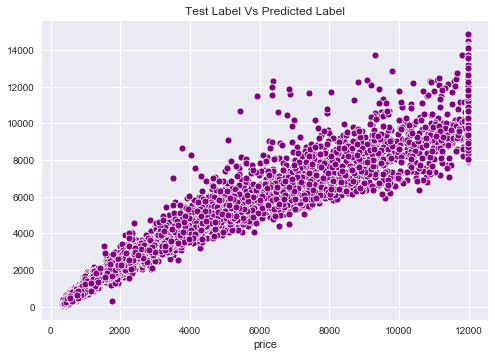

In [269]:
sns.scatterplot(y_test['price'], y_pred_test, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label')

In [270]:
############### ITERATION 3 ###################

In [271]:
## attempting scaling on the data

In [276]:
from scipy.stats import zscore

X_train['volume']=X_train['x']*X_train['y']*X_train['z']
X_test['volume']=X_test['x']*X_test['y']*X_test['z']
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)
X_train_scaled = X_train_scaled.drop('y', axis=1)
X_train_scaled = X_train_scaled.drop('z', axis=1)
X_train_scaled = X_train_scaled.drop('depth', axis=1)
X_train_scaled = X_train_scaled.drop('table', axis=1)
X_test_scaled = X_test_scaled.drop('y', axis=1)
X_test_scaled = X_test_scaled.drop('z', axis=1)
X_test_scaled = X_test_scaled.drop('depth', axis=1)
X_test_scaled = X_test_scaled.drop('table', axis=1)



C:\Users\ratee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ratee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [277]:
X_train_scaled

,carat,cut,color,clarity,x,volume
17417,-1.020850,0.977964,-0.820537,2.418378,-1.195297,-1.006207
22393,-0.977707,0.078398,-0.233072,-0.026832,-1.150990,-0.983049
20522,2.657119,-0.821169,-1.408002,-0.026832,2.092274,2.538018
13908,-0.610988,0.977964,-0.233072,-0.026832,-0.548417,-0.613113
4534,-1.020850,0.078398,-0.820537,-0.026832,-1.221881,-1.019851
...,...,...,...,...,...,...
24875,-0.999278,0.977964,0.354394,2.418378,-1.115545,-0.964141
2934,-1.063993,0.078398,-1.408002,0.584470,-1.177575,-0.997007
26817,1.157888,0.078398,0.941859,-1.249437,1.117522,1.042640
6622,-0.179555,0.977964,0.941859,-0.638135,0.054157,-0.130375


In [278]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1681515994920986
The coefficient for cut is 0.03886382903552187
The coefficient for color is 0.13157391915601893
The coefficient for clarity is 0.20558188978401645
The coefficient for x is -0.11896829912319361
The coefficient for volume is 0.004460347899609478


In [280]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.3274571197786889e-16


In [281]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9268612878102879

In [282]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9320805679389166

In [283]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [284]:
import math

math.sqrt(mse)

0.2606135684516118

In [285]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [286]:
math.sqrt(mse)

0.2704416983190874

In [298]:
data_train3 = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test3 = pd.concat([X_test_scaled,y_test_scaled],axis=1)

data_train3.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,18841.0,-1.394305e-16,1.000027,-1.279710,-0.848277,-0.201127,0.553881,2.657119
cut,18841.0,-9.571335e-16,1.000027,-2.620303,-0.821169,0.078398,0.977964,0.977964
color,18841.0,-3.684166e-16,1.000027,-1.995467,-0.820537,-0.233072,0.941859,1.529324
clarity,18841.0,1.387116e-16,1.000027,-1.860740,-0.638135,-0.026832,0.584470,2.418378
x,18841.0,-4.254922e-16,1.000027,-1.771287,-0.902872,-0.034457,0.727622,3.173362
volume,18841.0,-2.678065e-16,1.000027,-1.261872,-0.843421,-0.209022,0.561104,4.745797
price,18841.0,-2.006722e-16,1.000027,-0.980376,-0.802275,-0.392271,0.463993,2.372026


In [288]:
expr = 'price ~ carat + cut + color + clarity + volume'

In [289]:
lm3 = smf.ols(formula= expr, data = data_train3).fit()
lm3.params

Intercept    2.255141e-17
carat        1.088202e+00
cut          3.845729e-02
color        1.303271e-01
clarity      2.092927e-01
volume      -3.187305e-02
dtype: float64

In [290]:
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 5.133e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:53:58   Log-Likelihood:                -1460.3
No. Observations:               18841   AIC:                             2933.
Df Residuals:                   18835   BIC:                             2980.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.255e-17      0.002   1.18e-14      1.0

<Figure size 576x432 with 0 Axes>

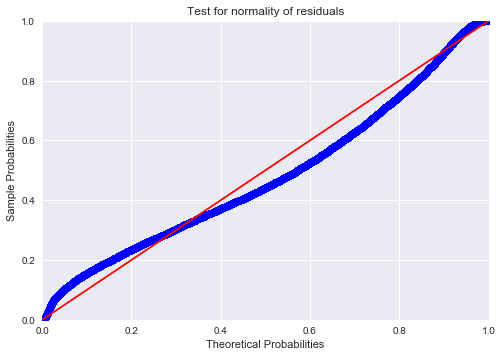

In [291]:
draw_pp_plot(lm3,"Test for normality of residuals")

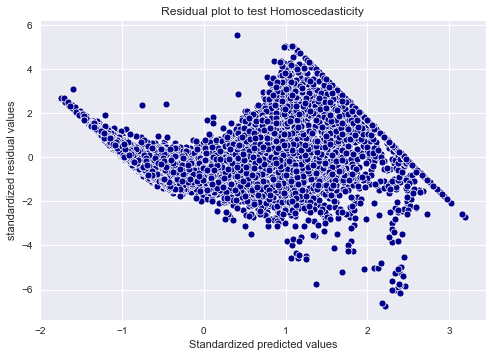

In [292]:
plot_resid_fitted(lm3.fittedvalues,
                  lm3.resid,
                  "Residual plot to test Homoscedasticity")

In [293]:
y_pred_train = lm3.predict(data_train3.drop('price',axis=1))
rmse_train = np.sqrt(mean_squared_error(data_train3['price'],y_pred_train))
print("The Root Mean Squared Error for train {}".format(rmse_train))

The Root Mean Squared Error for train 0.2614712946761062


In [294]:
y_pred_test = lm3.predict(data_test3.drop('price',axis=1))

In [295]:
rmse_test = np.sqrt(mean_squared_error(data_test3['price'],y_pred_test))
print("The Root Mean Squared Error for test {}".format(rmse_test))

The Root Mean Squared Error for test 0.2708579944270211


In [296]:
rsquare = metrics.r2_score(y_pred_test, data_test3['price'])
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9212153184912829


Text(0.5, 1.0, 'Test Label Vs Predicted Label')

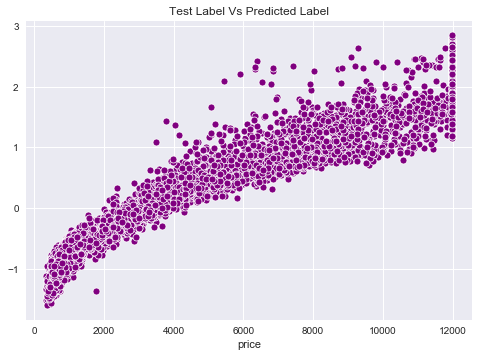

In [297]:
sns.scatterplot(y_test['price'], y_pred_test, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label')